In [2]:
import numpy as np
import pandas as pd
import twosigmafunc

In [9]:
import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Loading data

In [5]:
train, origin_features = twosigmafunc.preprocess()

In [6]:
train = train.fillna(train.median())

# Plot 

In [6]:
id = 40

In [7]:
train['tec20_group'] = train.technical_20 * train.technical_22

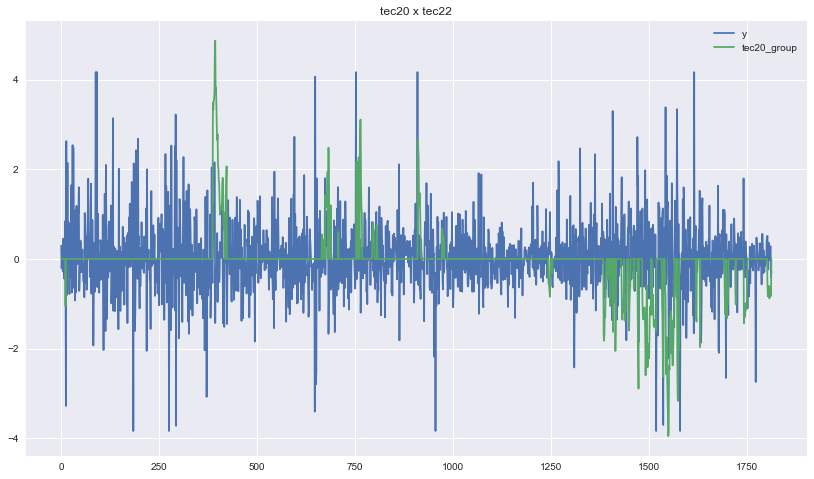

In [12]:
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'tec20_group'] / train.tec20_group.std(), label='tec20_group')
plt.legend()
plt.title('tec20 x tec22')

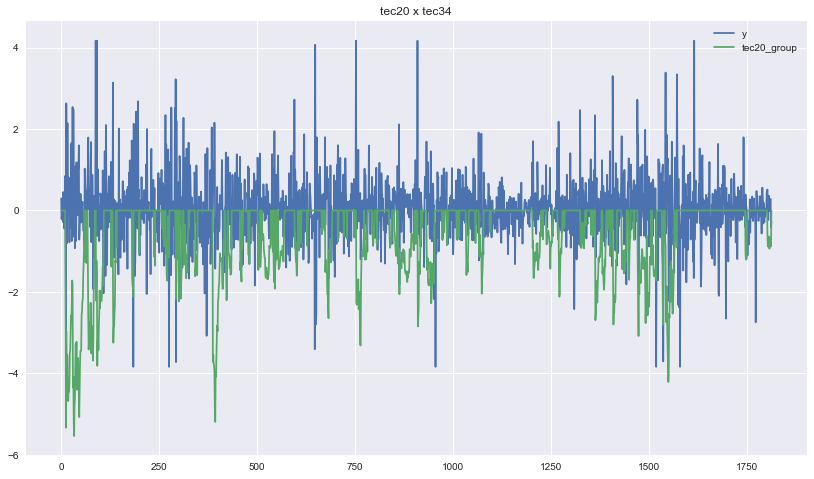

In [13]:
train['tec20_group_34'] = train.technical_20 * train.technical_34
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'tec20_group_34'] / train.tec20_group_34.std(), label='tec20_group')
plt.legend()
plt.title('tec20 x tec34')

In [15]:
train['tec20-30'] = train.technical_20 - train.technical_30

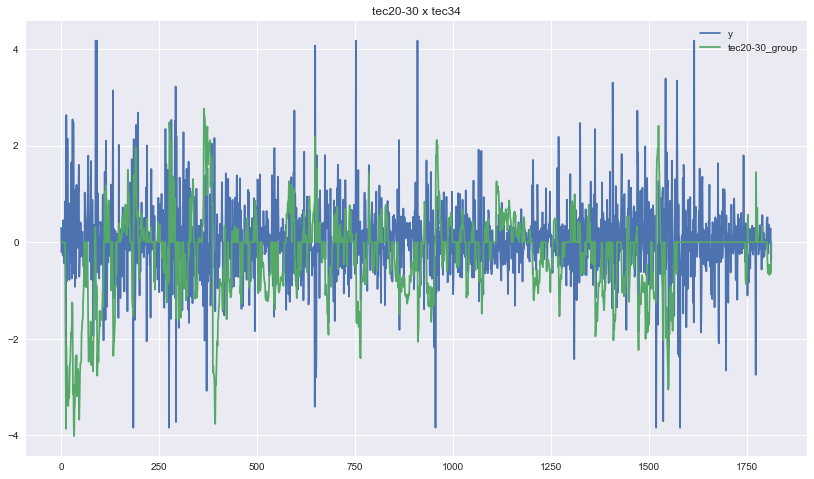

In [14]:

train['tec20-30_group_34'] = train['tec20-30'] * train.technical_34
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'tec20-30_group_34'] /
         train['tec20-30_group_34'].std(), label='tec20-30_group')
plt.legend()
plt.title('tec20-30 x tec34')

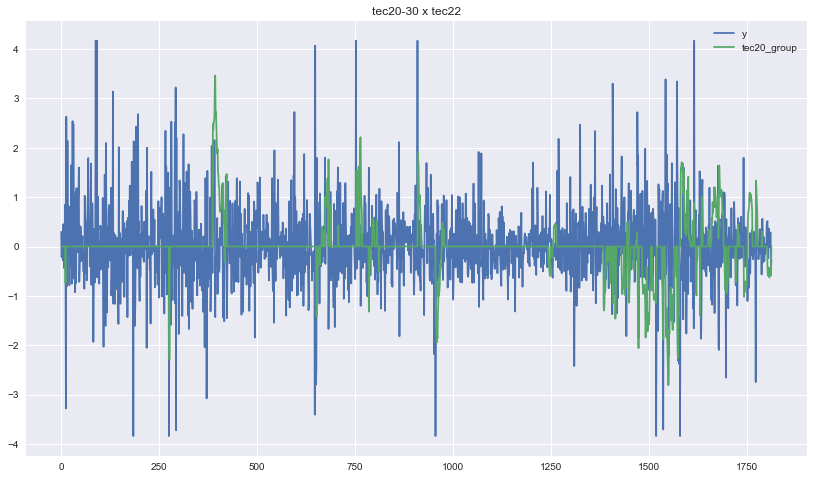

In [15]:
train['tec20-30_group_22'] = train['tec20-30'] * train.technical_22
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'tec20-30_group_22'] / train['tec20-30_group_22'].std(), label='tec20_group')
plt.legend()
plt.title('tec20-30 x tec22')

# Sum two groups  

In [16]:
train['new'] = train['tec20-30_group_22'] + train['tec20-30_group_34']

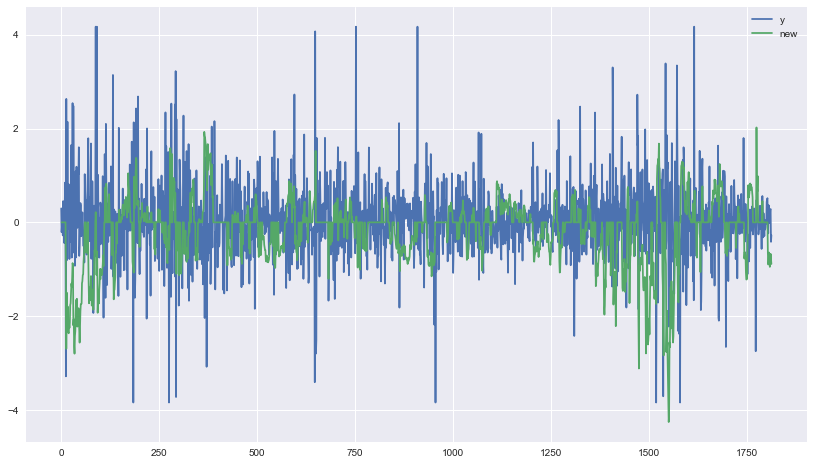

In [58]:
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[train.id == id, 'timestamp'], train.loc[train.id == id, 'new'].shift() / train['new'].std(), label='new')
plt.legend()

In [59]:
condition = (train.id == id) & (train.timestamp > 1400) & (train.timestamp < 1600)

negative new features

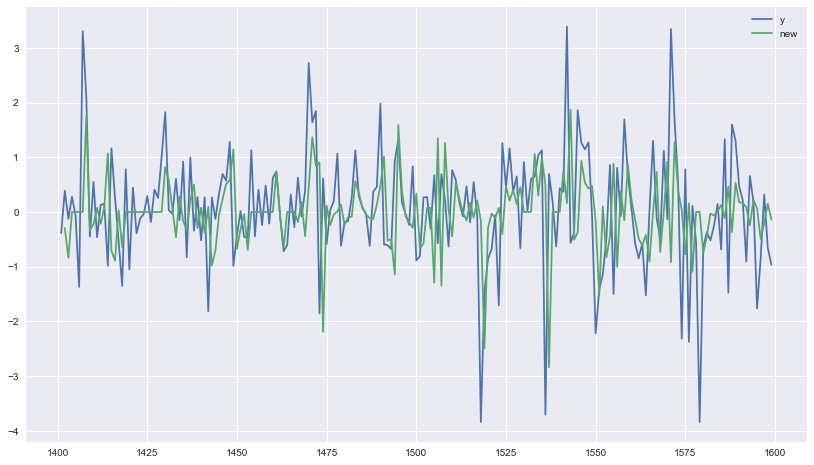

In [60]:
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], - train.loc[condition, 'new'].diff() / train['new'].std(), label='new')
plt.legend()

shift back

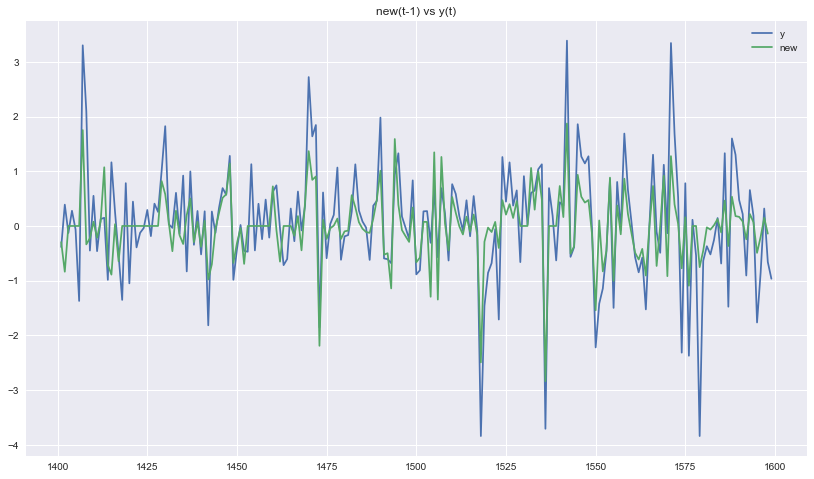

In [61]:
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], - train.loc[condition, 'new'].diff().shift(-1) / train['new'].std(), label='new')
plt.legend()
plt.title('new(t-1) vs y(t)')

In [63]:
condition = (train.id == id) & (train.timestamp > 1500) & (train.timestamp < 1520)

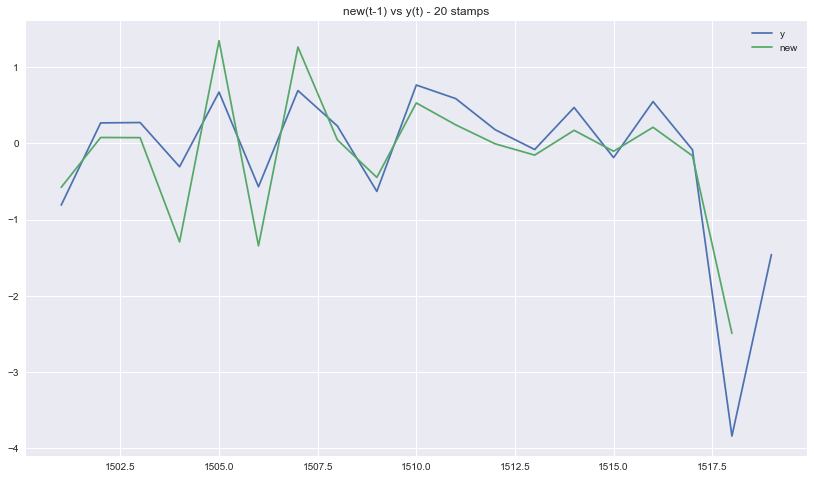

In [64]:
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], - train.loc[condition, 'new'].diff().shift(-1) / train['new'].std(), label='new')
plt.legend()
plt.title('new(t-1) vs y(t) - 20 stamps')

会不会✖️离散变量根本没起到作用？只是 id 40 的离散变量取值都差不多，相当于乘了一个常数？试试看

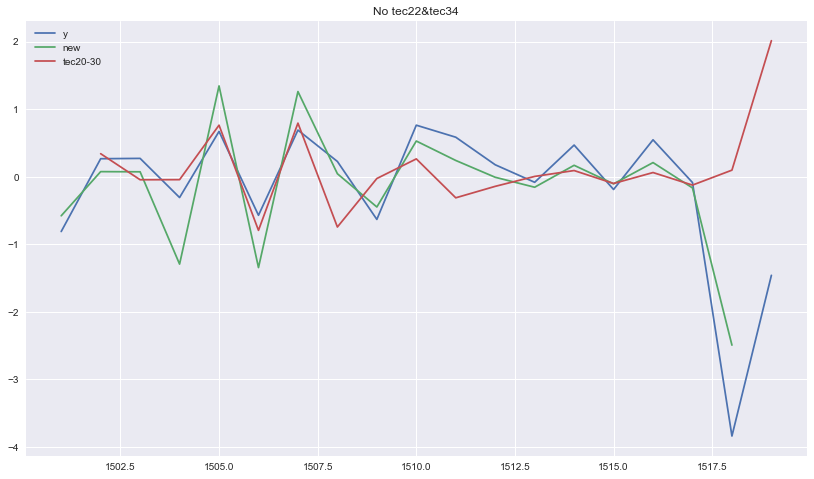

In [66]:
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], - train.loc[condition, 'new'].diff().shift(-1) / train['new'].std(), label='new')
plt.plot(train.loc[condition, 'timestamp'], - train.loc[condition, 'tec20-30'].diff() / train['tec20-30'].std(), label='tec20-30')
plt.legend()
plt.title('No tec22&tec34')

事实证明作用还是有的，看一下其他的 id

In [69]:
condition = (train.id == 41) & (train.timestamp > 1500) & (train.timestamp < 1620)

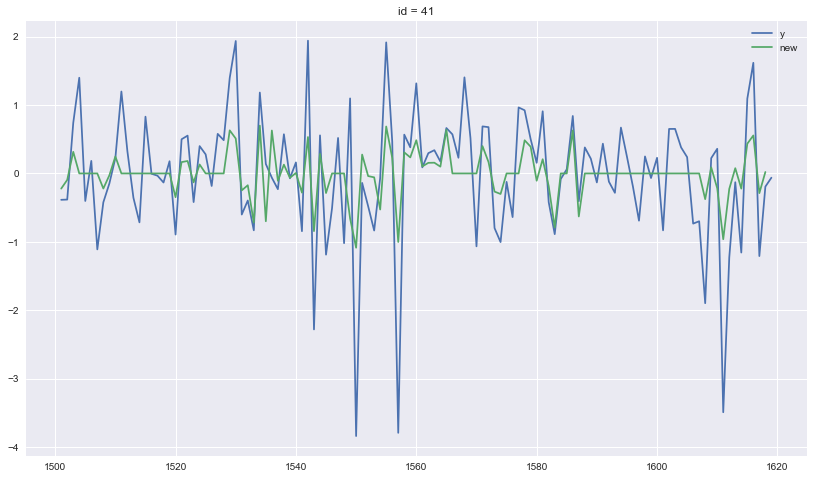

In [71]:
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], - train.loc[condition, 'new'].diff().shift(-1) / train['new'].std(), label='new')
plt.legend()
plt.title('id = 41')

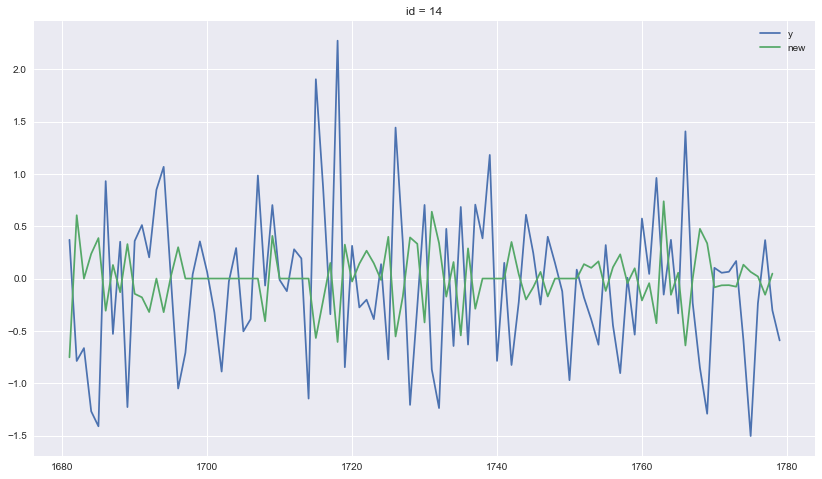

In [79]:
condition = (train.id == 14) & (train.timestamp > 1680) & (train.timestamp < 1780)
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], - train.loc[condition, 'new'].diff().shift(-1) / train['new'].std(), label='new')
plt.legend()
plt.title('id = 14')

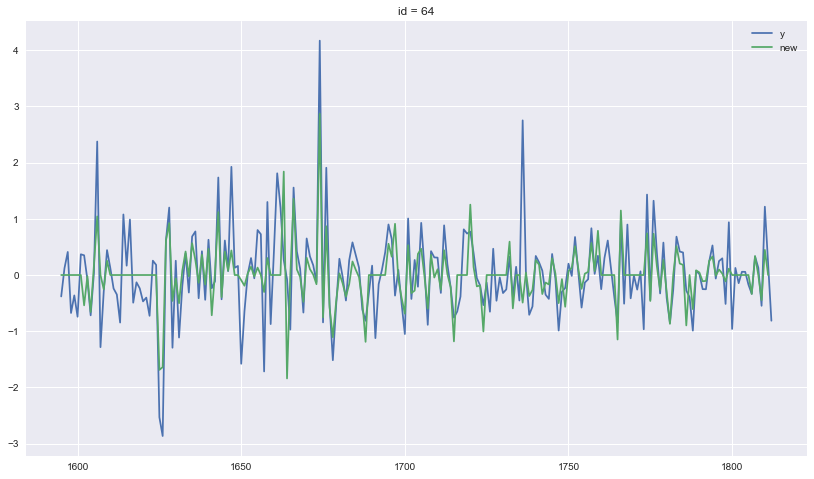

In [21]:
condition = (train.id == 64) 
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'tec20-30'].diff().shift(-1) / train['new'].std(), label='new')
plt.legend()
plt.title('id = 64')

总体相关性不高好像，但是感觉可以利用起来

In [22]:
twosigmafunc.add_diffs(train, ['technical_20', 'technical_30'])

sucessfully add 2 diff features


In [23]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,y,tec20_group,tec20_group_34,tec20-30,tec20-30_group_34,tec20-30_group_22,new,id_diff,technical_20_diff,technical_30_diff
131062,0,167,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,-0.007108,-0.0,0.0,0.0,0.0,-0.0,0.0,NaN,0.0,0.0
131895,0,168,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.001950,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
132728,0,169,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.017724,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
133561,0,170,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.012934,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
134393,0,171,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,-0.025229,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0


In [24]:
train['tec20-30_diff'] = train.technical_20 - train.technical_30

In [25]:
train['tec20-30_diff_past'] = train['tec20-30_diff'].shift()

In [27]:
train.loc[train.id_diff != 0, 'tec20-30_diff_past'] = 0

In [31]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,tec20-30,tec20-30_group_34,tec20-30_group_22,new,id_diff,technical_20_diff,technical_30_diff,tec20-30_diff,tec20-30_diff_past,y_past
131062,0,167,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.0,0.0,-0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000
131895,0,168,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007108
132728,0,169,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001950
133561,0,170,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017724
134393,0,171,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012934


In [30]:
train['y_past'] = train.y.shift().fillna(0)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=-1, normalize=True)
lr.fit(train[['new', 'tec20-30_diff_past']], train.y_past)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [37]:
pred = lr.predict(train[['new', 'tec20-30_diff_past']]).clip(-0.08, 0.08)

In [38]:
twosigmafunc.R_score(pred.clip(-0.08, 0.08), train.y_past)

0.17838161121031243

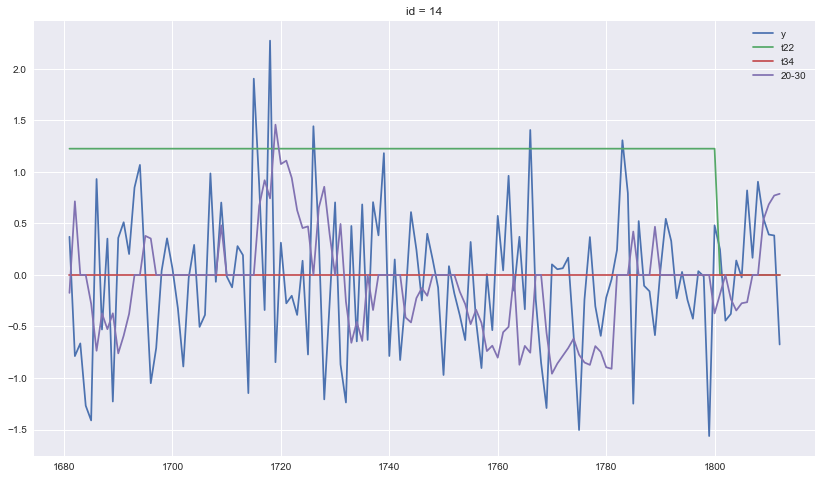

In [18]:
condition = (train.id == 14) & (train.timestamp > 1680) & (train.timestamp < 1820)
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'] / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_22'] / train['technical_22'].std(), label='t22')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_34'] / train['technical_34'].std(), label='t34')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'tec20-30'] / train['tec20-30'].std(), label='20-30')
plt.legend()
plt.title('id = 14')

In [19]:
train['tec22+30'] = train.technical_22 + train.technical_34

In [21]:
gp = train.groupby('tec22+30')

In [22]:
gp.mean()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y,tec20-30
tec22+30,,,,,,,,,,,,,,,,,,,,,
-1.0,1127.355425,860.573179,0.531652,2.218046e+11,0.004500,0.043395,-0.005651,-0.204931,-5.638529e+06,0.029393,...,-0.100191,-0.099625,-0.084850,-0.188868,0.004151,-0.043451,-0.838756,-0.000662,0.000259,0.000165
-0.5,1073.079356,968.391609,0.102736,2.080655e+12,-0.418874,-0.159878,0.750061,-0.107273,-1.669034e+09,-0.011965,...,-0.106442,-0.087942,-0.085658,-0.085126,0.005822,-0.030856,-0.932115,0.000188,0.000238,0.000174
0.0,1068.495670,987.726849,-9.449849,5.627605e-01,0.180381,-0.115709,31.864222,-0.003353,7.078665e-03,-0.173256,...,-0.085539,-0.076659,-0.069075,0.044532,0.004354,-0.013989,-1.013744,0.000287,0.000233,0.000264
0.5,1106.782252,937.477221,-4.837439,6.683603e+11,-1.173422,-0.081976,11.577118,0.058733,2.087781e-01,-0.215725,...,-0.083709,-0.072301,-0.063047,0.155441,0.005132,-0.003869,-1.006242,0.000470,0.000193,0.000228
1.0,1140.094395,897.109558,-2.343342,1.132360e+12,0.340201,-3.275832,5.331571,0.137838,4.486523e-02,-0.264874,...,-0.074578,-0.074203,-0.059235,0.362106,0.006959,0.005190,-1.014448,0.001602,0.000176,0.000112


In [23]:
gp.mean().std().sort_values(ascending=False)

fundamental_17    1.286823e+14
fundamental_61    1.229972e+12
derived_1         8.276550e+11
fundamental_1     7.457881e+08
fundamental_42    8.947233e+03
fundamental_41    8.579318e+03
fundamental_33    1.205974e+03
fundamental_26    1.336225e+02
timestamp         5.187425e+01
fundamental_12    4.706752e+01
fundamental_7     4.083204e+01
id                3.189494e+01
fundamental_32    2.534353e+01
fundamental_36    2.257879e+01
fundamental_23    1.874582e+01
derived_4         1.311443e+01
fundamental_50    8.763731e+00
fundamental_14    6.573180e+00
fundamental_44    4.242535e+00
derived_0         4.102102e+00
fundamental_27    2.703418e+00
fundamental_45    2.535490e+00
fundamental_20    2.406372e+00
fundamental_34    1.863102e+00
derived_3         1.431870e+00
fundamental_18    1.054251e+00
fundamental_51    6.649613e-01
fundamental_29    6.434506e-01
derived_2         6.068111e-01
fundamental_5     5.323296e-01
                      ...     
technical_42      1.977826e-02
technica

In [24]:
funda_features = [col for col in origin_features if col.startswith('fund')]

In [26]:
gp.mean()[funda_features]

,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,...,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63
tec22+30,,,,,,,,,,,,,,,,,,,,,
-1.0,-0.204931,-5.638529e+06,0.029393,-0.001822,0.025897,0.052937,0.117547,0.035079,-0.078619,0.071789,...,0.061409,0.009990,0.063731,0.185689,0.035713,-0.006784,0.012058,9.299202e+09,-0.046889,0.077137
-0.5,-0.107273,-1.669034e+09,-0.011965,0.002714,0.054364,0.070929,36.165394,0.025222,-0.063688,0.142114,...,0.076778,-0.029793,0.094804,0.114729,0.030962,0.050519,0.054300,2.752612e+12,-0.053962,0.101806
0.0,-0.003353,7.078665e-03,-0.173256,0.002931,0.264082,0.089929,58.120026,0.052213,0.011086,0.535346,...,0.158522,-0.087607,0.065904,0.108046,0.019962,0.135497,0.175292,1.874484e-01,-0.047290,0.117608
0.5,0.058733,2.087781e-01,-0.215725,0.016706,0.468807,0.090232,96.383423,0.079844,-0.200603,0.525865,...,0.208691,-0.063818,-0.024153,0.091160,0.003400,0.225414,0.231502,1.275374e-01,-0.046931,0.170117
1.0,0.137838,4.486523e-02,-0.264874,0.041134,1.324479,0.066113,0.351678,0.101322,-0.010503,0.721324,...,0.346311,-0.190156,-0.094322,0.275157,-0.007967,0.368067,0.288807,1.407269e-01,-0.055581,0.223306


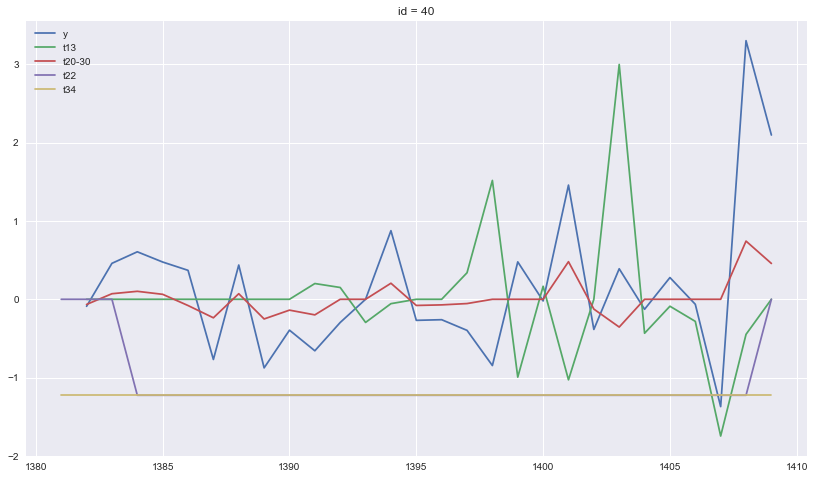

In [46]:
condition = (train.id == 40) & (train.timestamp > 1380) & (train.timestamp < 1410)
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'].shift() / train.y.std(), label='y')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_13'].diff() / train['technical_13'].diff().std(), label='t13')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'tec20-30'].diff() / train['tec20-30'].diff().std(), label='t20-30')
#plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_30'] / train['technical_30'].std(), label='t30')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_22'] / train['technical_22'].std(), label='t22')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_34'] / train['technical_34'].std(), label='t34')



plt.legend()
plt.title('id = 40')

In [47]:
train['tec20-30_past'] = train['tec20-30'].shift().fillna(0)

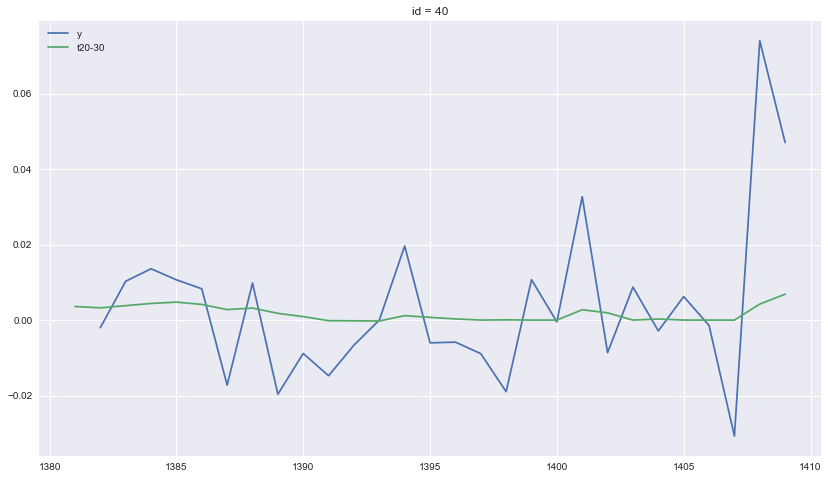

In [50]:
condition = (train.id == 40) & (train.timestamp > 1380) & (train.timestamp < 1410)
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'y'].shift(), label='y')
#plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_13'].diff() 
         #/ train['technical_13'].diff().std(), label='t13')
plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'tec20-30'] * 0.92 + train.loc[condition, 'tec20-30_past'] * 0.07, label='t20-30')
#plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_30'] / train['technical_30'].std(), label='t30')
#plt.plot(train.loc[condition, 'timestamp'], train.loc[condition, 'technical_22'] / train['technical_22'].std(), label='t22')
#plt.plot(train.loc[condition, 'timestamp '], train.loc[condition, 'technical_34'] / train['technical_34'].std(), label='t34')

plt.legend()
plt.title('id = 40')